## K-NEAREST NEIGHBOURS
Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?



## Task 1
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('Zoo.csv')

In [16]:
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [4]:
df.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [5]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
df.shape

(101, 18)

In [8]:
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [9]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

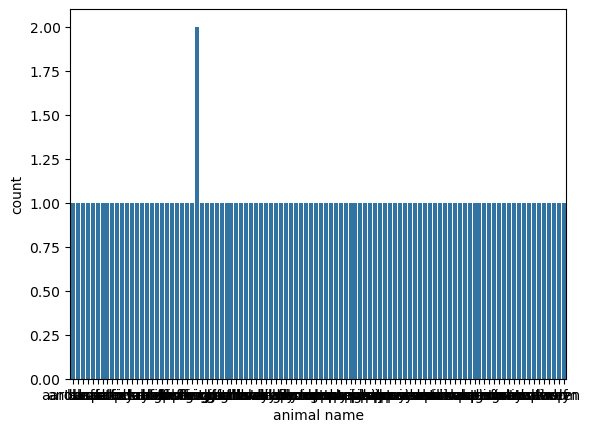

In [10]:
sns.countplot(x = 'animal name', data = df)
plt.show()

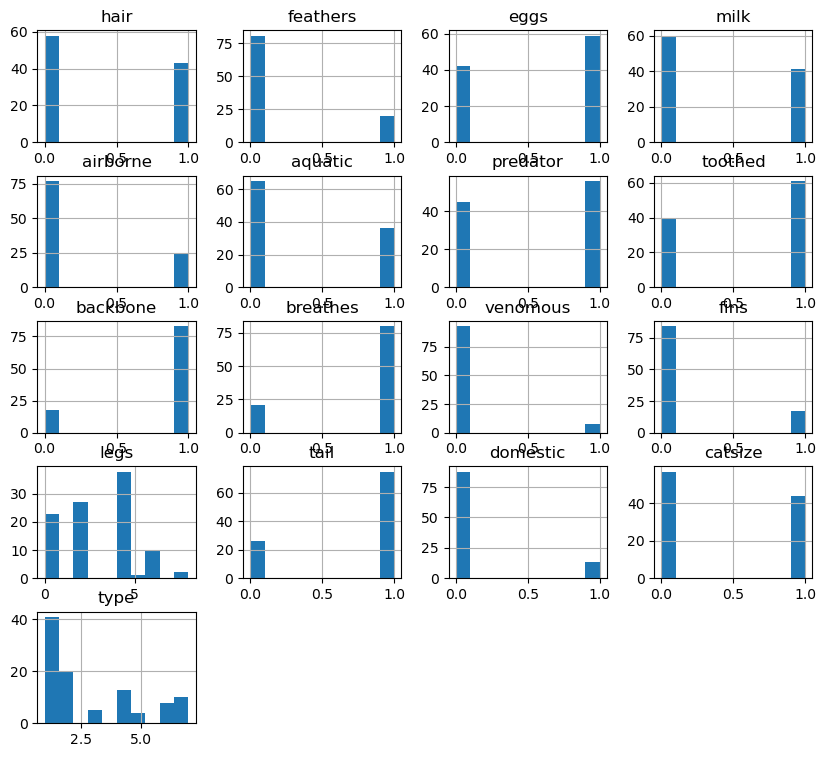

In [11]:
df.hist(figsize = (10,9))
plt.show()

KeyError: 'animal name'

<Figure size 1500x1500 with 0 Axes>

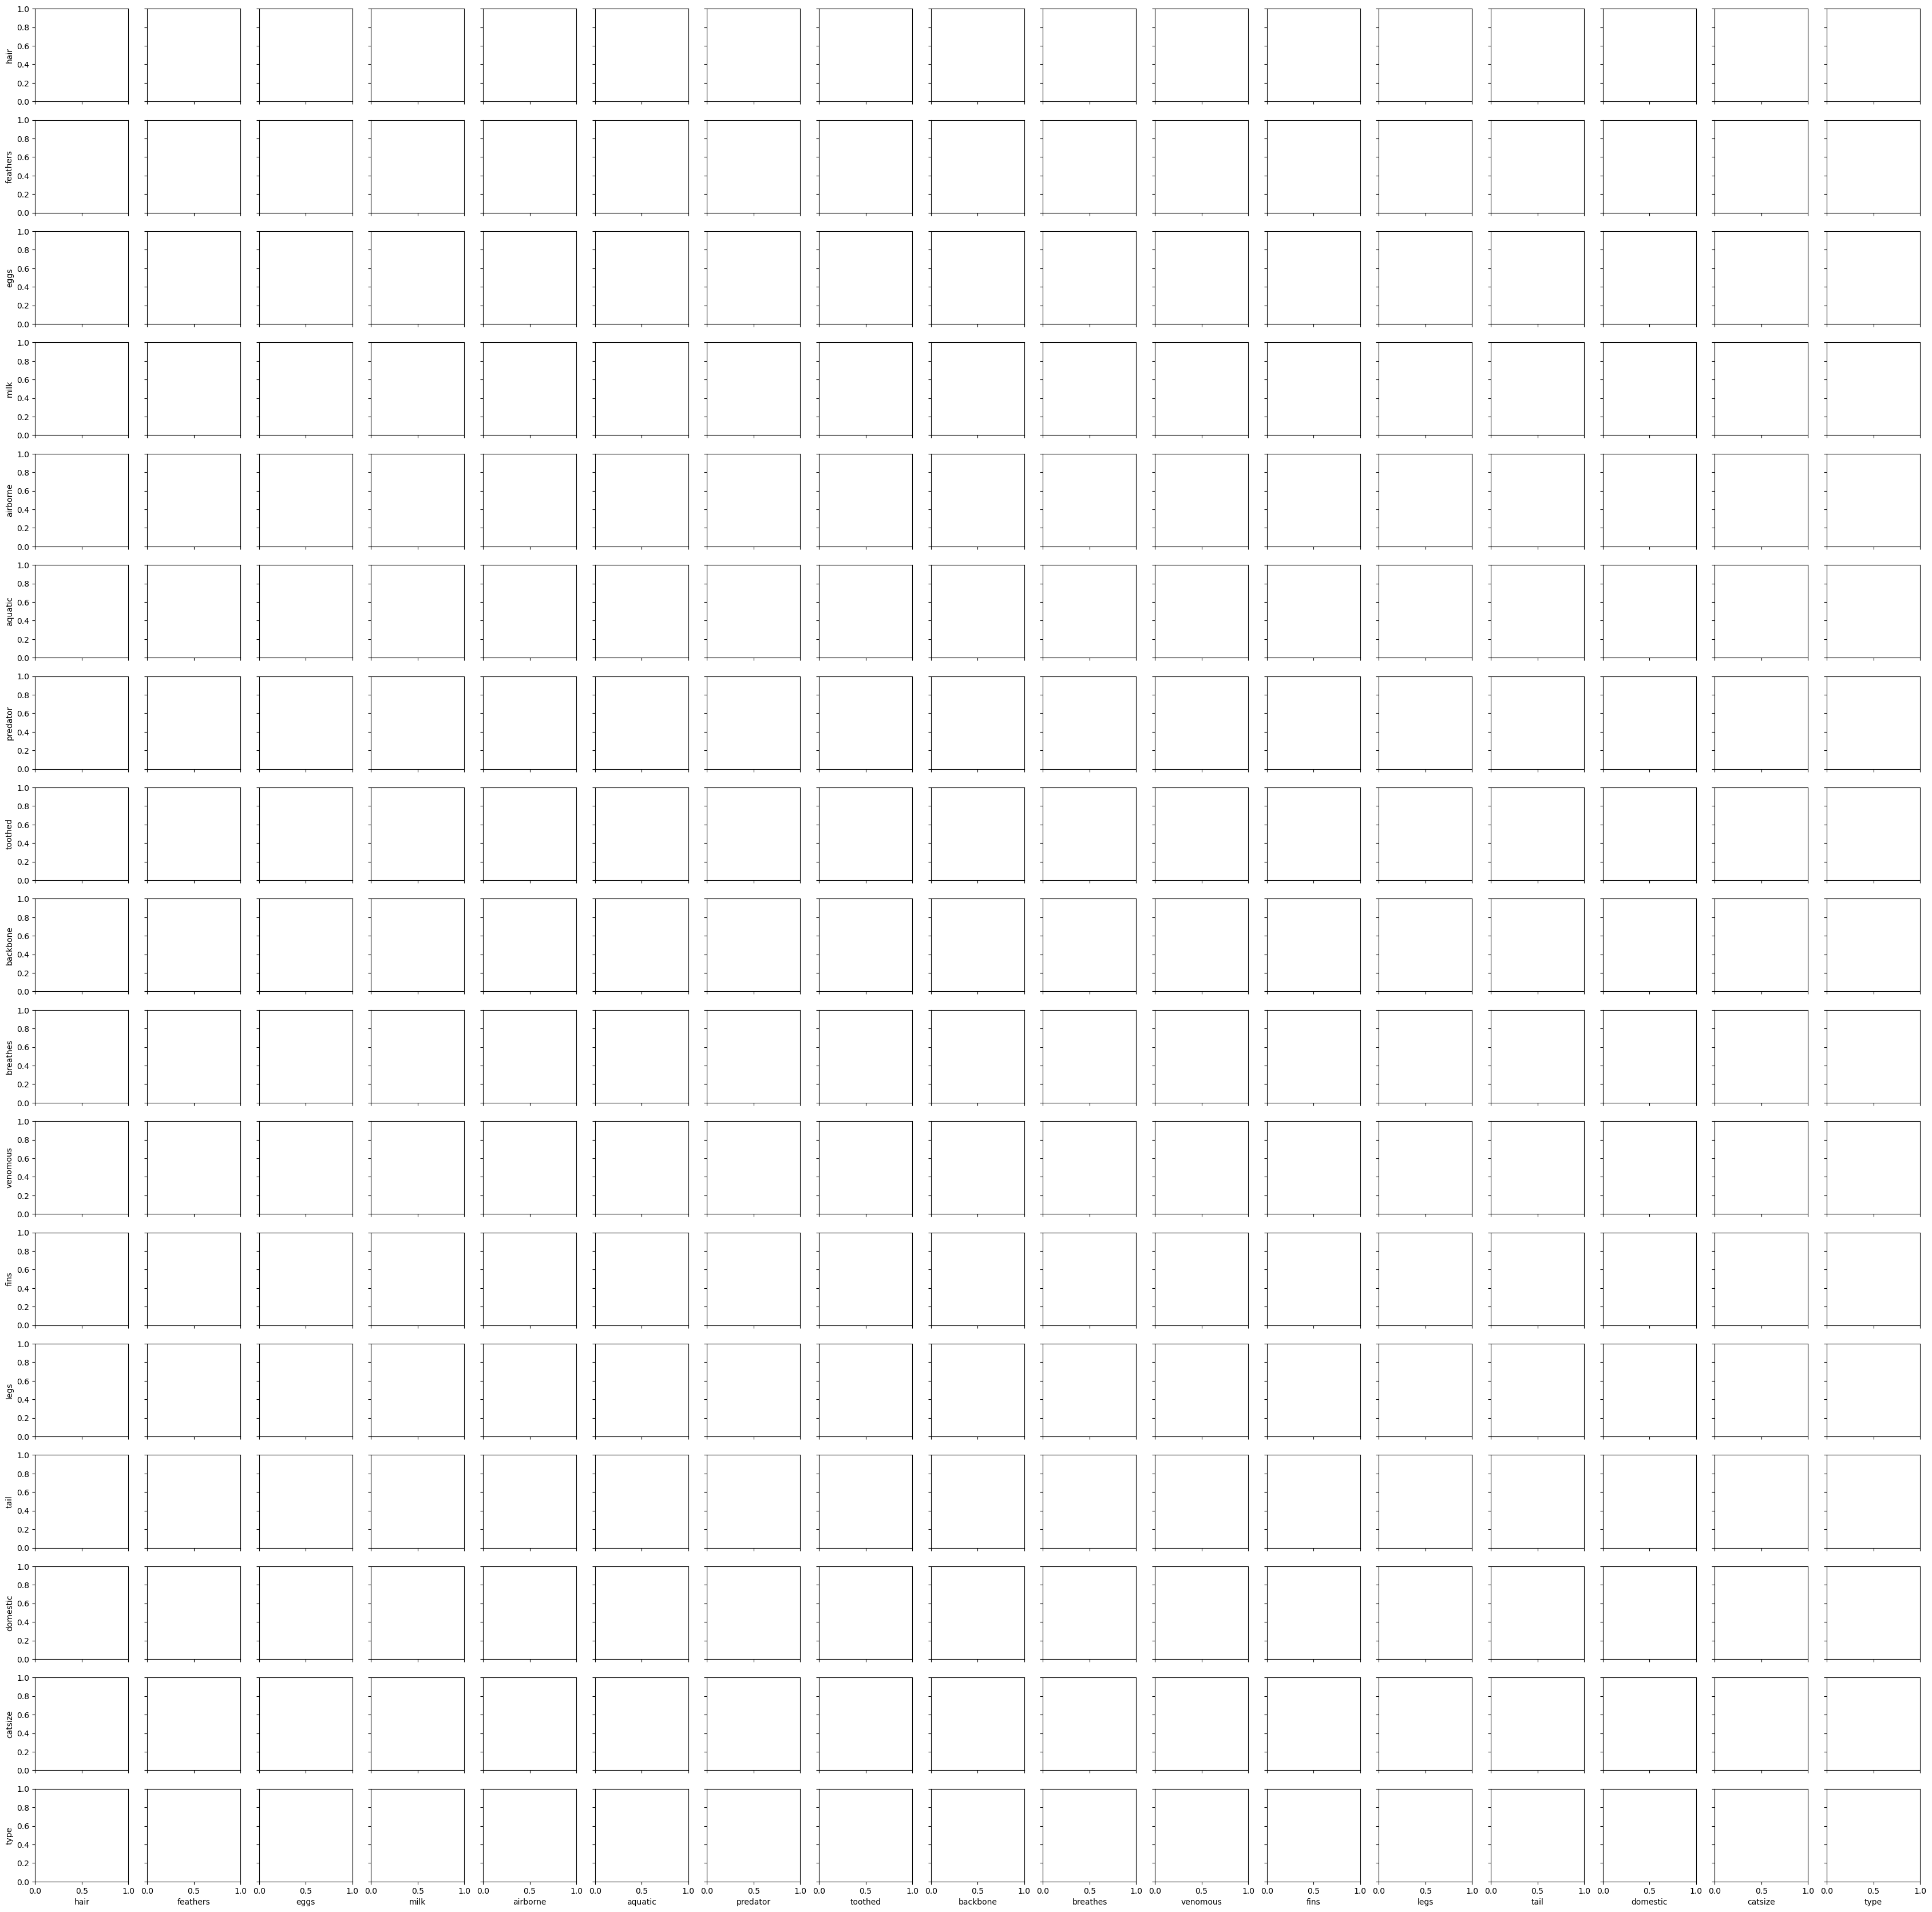

In [34]:
plt.figure(figsize = (15,15))
sns.pairplot(df, hue = 'animal name')
plt.show()

In [ ]:
df = df.drop('animal name',axis=1)
#df = df.drop(columns = "animal type")
df

In [21]:
x = df.drop('type', axis= 1)
y= df['type']

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y , test_size= 0.2, random_state= 42)


## Task 2
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3 , metric= 'euclidean')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.9523809523809523


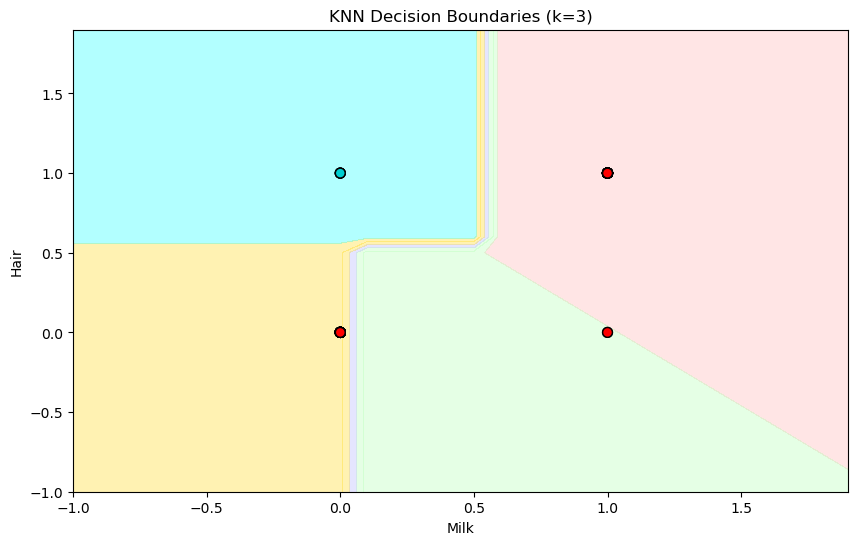

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

features = ['milk', 'hair']
X_vis = df[features].values
y_vis = df['type'].values

x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_vis.fit(x_train_vis, y_train_vis)
h = 0.1  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#00FFFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#DAA520', '#00CED1'])
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel(features[0].capitalize())
plt.ylabel(features[1].capitalize())
plt.title('KNN Decision Boundaries (k=3)')
plt.show()


## Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


## Answer:

(1)-> n_neighbor : used to fin number of nearest neighbors(points)
Metric : Distance measures(Like euclidean distance, manhattan distance)
Weights : How neighbors vote


(2)-> Euclidean distance, manhattan distance, and hamming distance